In [2]:
#NELU (~1900 clean); ANCR (~31700 clean); TRSP (930 clean); ANLO (~750 clean); DEBRIS

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
from sklearn import metrics
pd.set_option('display.max_columns', None)

In [3]:
# load preprocessed data
file_path = 'C:/Users/svenj/Documents/Uni/Bachelorarbeit/Codes/data_all_reset.csv'

# Read the CSV file into a DataFrame
data_all_reset = pd.read_csv(file_path)
data_all_reset

,Particle ID,Area (ABD),Area (Filled),Aspect Ratio,Average Blue,Average Green,Average Red,Calibration Factor,Calibration Image,Camera,Capture X,Capture Y,Ch1 Area,Ch1 Peak,Ch1 Width,Ch2 Area,Ch2 Peak,Ch2 Width,Ch2/Ch1 Ratio,Circle Fit,Circularity,Circularity (Hu),Compactness,Convex Perimeter,Convexity,Date,Diameter (ABD),Diameter (ESD),Diameter (FD),Edge Gradient,Elapsed Time,Elongation,Feret Angle Max,Feret Angle Min,Fiber Curl,Fiber Straightness,Filter Score,Geodesic Aspect Ratio,Geodesic Length,Geodesic Thickness,Image File,Image Height,Image Width,Image X,Image Y,Intensity,Length,Original Reference ID,Particles Per Chain,Perimeter,Ratio Blue/Green,Ratio Red/Blue,Ratio Red/Green,Roughness,Scatter Area,Scatter Peak,Scatter Width,Sigma Intensity,Source Image,Sphere Complement,Sphere Count,Sphere Unknown,Sphere Volume,Sum Intensity,Symmetry,Time,Timestamp,Transparency,Volume (ABD),Volume (ESD),Width,Class,path
0,1,225.6288,242.5331,0.7807,103.6006,108.9748,111.5660,0.7075,1,1,478,885,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6528,0.7207,0.8890,1.3876,67.8397,0.9575,2023-07-07,16.9493,20.1441,17.5728,61.5870,1.688,1.8052,45.0,-45.0,0.0749,0.9304,0.0,0.5540,24.7150,13.6911,NELU-C2-10x_000001.tif,37,34,0,0,107.6777,22.9938,4C7B7810-460E-4A30-A499-EAD2BF8B789B,1,76.8122,0.9507,1.0769,1.0238,1.1323,0.0,0.0,0.0,22.8898,32,0.0,0,0.0,0.0,68483.0,0.6080,10:46:13,2023-07-07T10:46:13.597,0.1586,2549.5040,4279.983,17.3338,WRONG,C:/Users/svenj/Documents/Uni/Bachelorarbeit/Co...
1,2,58.4998,58.8657,0.6323,103.9087,115.0776,118.6621,0.7075,1,1,861,541,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5818,0.3583,0.7126,2.7910,44.0031,0.7692,2023-07-07,8.6304,12.5188,8.6574,60.0400,1.688,6.6170,-85.0,0.0,0.7746,0.5635,0.0,0.1511,26.9941,4.0795,NELU-C2-10x_000001.tif,29,23,36,0,112.1370,15.2112,CB5DBFBA-91B3-49D0-9F3F-40D0F3135833,1,62.1472,0.9029,1.1420,1.0311,1.4123,0.0,0.0,0.0,9.8916,32,0.0,0,0.0,0.0,24558.0,0.4728,10:46:13,2023-07-07T10:46:13.597,0.3106,336.5858,1027.280,10.2588,WRONG,C:/Users/svenj/Documents/Uni/Bachelorarbeit/Co...
2,3,173.9068,176.7952,0.4683,113.4023,124.5566,127.6934,0.7075,1,1,221,1391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4288,0.3191,0.7033,3.1334,66.3636,0.8405,2023-07-07,14.8804,19.6135,15.0034,51.7025,1.735,7.7141,-70.0,20.0,0.7824,0.5610,0.0,0.1296,44.7665,5.8032,NELU-C2-10x_000001.tif,40,34,61,0,121.5781,25.1163,8777DAD3-5004-4A14-866F-1C43EE9BD1A2,1,101.1395,0.9104,1.1260,1.0252,1.5240,0.0,0.0,0.0,17.2754,33,0.0,0,0.0,0.0,62248.0,0.5822,10:46:13,2023-07-07T10:46:13.649,0.2413,1725.1970,3950.591,11.6738,WRONG,C:/Users/svenj/Documents/Uni/Bachelorarbeit/Co...
3,4,90.9054,90.9054,0.2330,79.6361,87.9016,91.2787,0.7075,1,1,654,509,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1823,0.4398,0.4225,2.2739,59.0858,1.0000,2023-07-07,10.7585,17.3534,10.7585,159.7470,1.735,4.9412,15.0,-75.0,0.0636,0.9402,0.0,0.2024,27.4659,5.5585,NELU-C2-10x_000001.tif,20,43,97,0,85.8197,25.8238,458E8477-C0C7-4C20-8E2C-586257868DC1,1,66.0489,0.9060,1.1462,1.0384,1.1178,0.0,0.0,0.0,21.0279,33,0.0,0,0.0,0.0,26175.0,0.6954,10:46:13,2023-07-07T10:46:13.649,0.3800,652.0009,2736.230,4.5987,NELU,C:/Users/svenj/Documents/Uni/Bachelorarbeit/Co...
4,5,27.1872,27.1872,0.5611,132.4884,137.3721,138.3876,0.7075,1,1,599,1756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4863,0.1680,0.4172,5.9518,40.4736,0.5233,2023-07-07,5.8835,11.4183,5.8835,21.5500,1.782,16.6380,-10.0,-80.0,1.1548,0.4641,0.0,0.0601,32.7772,1.9700,NELU-C2-10x_000001.tif,21,30,142,0,136.0155,15.2112,75A12674-70A3-4CF8-A84C-7118003B215F,2,69.4945,0.9644,1.0445,1.0074,1.7170,0.0,0.0,0.0,4.8224,34,0.0,0,0.0,0.0,17546.0,0.5765,10:46:13,2023-07-07T10:46:13.700,0.4847,106.6374,779.469,7.4287,WRONG,C:/Users/svenj/Documents/Uni/Bachelorarbeit/Co...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166513,6770,45.9070,48.0345

## Remove unnessecary columns
Explanation of parameters see FlowCam Documentation.

In [4]:
columns_to_drop = [
    'Particle ID',
                   'Average Blue', 'Average Green', 'Average Red','Calibration Factor','Calibration Image','Camera', 'Capture X', 'Capture Y', 'Ch1 Area', 'Ch1 Peak', 'Ch1 Width', 'Ch2 Area', 'Ch2 Peak', 'Ch2 Width', 'Ch2/Ch1 Ratio', 'Date', 'Ratio Blue/Green','Ratio Red/Blue', 'Ratio Red/Green','Date','Elapsed Time', 'Filter Score', 
    'Image File', 
                    'Original Reference ID', 'Scatter Area', 'Scatter Peak', 'Scatter Width', 'Source Image', 'Sphere Complement', 'Sphere Count', 'Sphere Unknown', 'Sphere Volume','Time', 'Timestamp',
    'path']

data_wrong= data_all_reset.drop(columns=columns_to_drop)

In [5]:
print(data_wrong[data_wrong.Class == 'ANCR'].shape[0])
print(data_wrong[data_wrong.Class == 'NELU'].shape[0])
print(data_wrong[data_wrong.Class == 'TRSP'].shape[0])
print(data_wrong[data_wrong.Class == 'ANLO'].shape[0])
print(data_wrong[data_wrong.Class == 'TEMA'].shape[0])
print(data_wrong[data_wrong.Class == 'LUCU'].shape[0])

1612
1918
1503
997
1835
3679


In [6]:
data_wrong.Class.unique()
data_wrong

,Area (ABD),Area (Filled),Aspect Ratio,Circle Fit,Circularity,Circularity (Hu),Compactness,Convex Perimeter,Convexity,Diameter (ABD),Diameter (ESD),Diameter (FD),Edge Gradient,Elongation,Feret Angle Max,Feret Angle Min,Fiber Curl,Fiber Straightness,Geodesic Aspect Ratio,Geodesic Length,Geodesic Thickness,Image Height,Image Width,Image X,Image Y,Intensity,Length,Particles Per Chain,Perimeter,Roughness,Sigma Intensity,Sum Intensity,Symmetry,Transparency,Volume (ABD),Volume (ESD),Width,Class
0,225.6288,242.5331,0.7807,0.6528,0.7207,0.8890,1.3876,67.8397,0.9575,16.9493,20.1441,17.5728,61.5870,1.8052,45.0,-45.0,0.0749,0.9304,0.5540,24.7150,13.6911,37,34,0,0,107.6777,22.9938,1,76.8122,1.1323,22.8898,68483.0,0.6080,0.1586,2549.5040,4279.983,17.3338,WRONG
1,58.4998,58.8657,0.6323,0.5818,0.3583,0.7126,2.7910,44.0031,0.7692,8.6304,12.5188,8.6574,60.0400,6.6170,-85.0,0.0,0.7746,0.5635,0.1511,26.9941,4.0795,29,23,36,0,112.1370,15.2112,1,62.1472,1.4123,9.8916,24558.0,0.4728,0.3106,336.5858,1027.280,10.2588,WRONG
2,173.9068,176.7952,0.4683,0.4288,0.3191,0.7033,3.1334,66.3636,0.8405,14.8804,19.6135,15.0034,51.7025,7.7141,-70.0,20.0,0.7824,0.5610,0.1296,44.7665,5.8032,40,34,61,0,121.5781,25.1163,1,101.1395,1.5240,17.2754,62248.0,0.5822,0.2413,1725.1970,3950.591,11.6738,WRONG
3,90.9054,90.9054,0.2330,0.1823,0.4398,0.4225,2.2739,59.0858,1.0000,10.7585,17.3534,10.7585,159.7470,4.9412,15.0,-75.0,0.0636,0.9402,0.2024,27.4659,5.5585,20,43,97,0,85.8197,25.8238,1,66.0489,1.1178,21.0279,26175.0,0.6954,0.3800,652.0009,2736.230,4.5987,NELU
4,27.1872,27.1872,0.5611,0.4863,0.1680,0.4172,5.9518,40.4736,0.5233,5.8835,11.4183,5.8835,21.5500,16.6380,-10.0,-80.0,1.1548,0.4641,0.0601,32.7772,1.9700,21,30,142,0,136.0155,15.2112,2,69.4945,1.7170,4.8224,17546.0,0.5765,0.4847,106.6374,779.469,7.4287,WRONG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166513,45.9070,48.0345,0.3670,0.2740,0.0939,0.3485,10.6525,51.2507,0.6013,7.6453,14.8968,7.8204,88.2188,31.4339,30.0,-45.0,1.5338,0.3947,0.0318,54.6767,1.7394,29,32,874,237,132.8913,21.5787,1,112.8322,2.2016,41.5695,24452.0,0.2571,0.4868,234.0000,1730.000,6.7213,WRONG
166514,123.5345,148.5185,0.4621,0.0687,0.1154,0.2280,8.6680,111.7554,0.3446,12.5415,34.0975,13.7513,76.0245,25.1918,-60.0,35.0,0.6767,0.5964,0.0397,75.3290,2.9902,63,49,908,237,127.4201,44.9263,1,156.6384,1.4016,33.3056,49439.0,0.3158,0.6322,1030.0000,20800.000,19.4563,LUCU
166515,65.1297,74.1061,0.3652,0.1437,0.0691,0.2379,14.4640,79.3260,0.3534,9.1064,23.7602,9.7136,69.7368,43.4171,0.0,85.0,1.4472,0.4086,0.0230,75.3142,1.7347,28,52,959,237,137.3207,30.7763,1,154.0978,1.9426,36.2132,32545.0,0.2768,0.6167,395.0000,7020.000,12.3812,LUCU
166516,119.5490,150.5521,0.7210,0.4475,0.1002,0.3019,9.9814,90.5558,0.3790,12.3375,27.3370,13.8452,97.1787,29.3233,55.0,10.0,1.4840,0.4026,0.0341,81.7220,2.7869,48,42,1013,237,114.9074,32.8987,1,169.0178,1.8664,33.6843,43435.0,0.5084,0.5487,983.0000,10700.000,22.9938,LUCU


In [7]:
# drop all samples with label WRONG and Debris
data = data_wrong.drop(data_wrong[data_wrong.Class == 'WRONG'].index, inplace=False)
data

,Area (ABD),Area (Filled),Aspect Ratio,Circle Fit,Circularity,Circularity (Hu),Compactness,Convex Perimeter,Convexity,Diameter (ABD),Diameter (ESD),Diameter (FD),Edge Gradient,Elongation,Feret Angle Max,Feret Angle Min,Fiber Curl,Fiber Straightness,Geodesic Aspect Ratio,Geodesic Length,Geodesic Thickness,Image Height,Image Width,Image X,Image Y,Intensity,Length,Particles Per Chain,Perimeter,Roughness,Sigma Intensity,Sum Intensity,Symmetry,Transparency,Volume (ABD),Volume (ESD),Width,Class
3,90.9054,90.9054,0.2330,0.1823,0.4398,0.4225,2.2739,59.0858,1.0000,10.7585,17.3534,10.7585,159.7470,4.9412,15.0,-75.0,0.0636,0.9402,0.2024,27.4659,5.5585,20,43,97,0,85.8197,25.8238,1,66.0489,1.1178,21.0279,26175.0,0.6954,0.3800,652.0009,2736.230,4.5987,NELU
10,99.4467,105.7104,0.2579,0.2432,0.5121,0.4734,1.9526,57.7139,1.0000,11.2525,16.8817,11.6015,178.0658,3.8763,-70.0,25.0,0.0271,0.9736,0.2580,25.7978,6.6552,40,26,382,0,92.5535,25.1163,1,64.9061,1.1246,23.1323,30265.0,0.7011,0.3334,746.0183,2519.126,5.3063,NELU
12,97.8874,162.3962,0.2688,0.1977,0.5287,0.4866,1.8914,67.9420,1.0000,11.1640,20.1441,14.3795,82.1064,3.6694,65.0,-20.0,0.0406,0.9610,0.2725,29.8159,8.1255,47,25,433,0,102.7802,28.6538,1,75.8828,1.1169,14.8035,33198.0,0.8101,0.4458,728.5412,4279.983,6.7213,NELU
14,96.3309,119.5490,0.3461,0.0668,0.1797,0.4486,5.5638,64.9977,0.8173,11.0748,19.2597,12.3375,70.5274,15.4143,70.0,-10.0,0.9827,0.5044,0.0649,54.0051,3.5036,46,21,490,0,124.2539,27.2387,1,115.0172,1.7696,10.6368,39637.0,0.4088,0.4250,711.2332,3740.664,6.7213,NELU
16,119.9470,127.1327,0.2175,0.1328,0.4584,0.4012,2.1816,66.4822,1.0000,12.3580,19.6921,12.7228,155.6742,4.6382,-30.0,65.0,0.0340,0.9671,0.2156,30.3598,6.5455,27,46,572,0,82.1029,29.3613,1,73.8106,1.1102,19.4487,31117.0,0.7542,0.3724,988.2064,3998.284,5.3063,NELU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166508,82.0731,95.1653,0.2817,0.1195,0.1569,0.2487,6.3741,80.2568,0.4573,10.2225,24.0943,11.0076,80.2180,17.9692,-80.0,5.0,0.5537,0.6436,0.0557,53.3131,2.9669,55,26,641,237,122.0426,34.3137,1,112.5601,1.4025,39.0471,34416.0,0.3658,0.5757,559.0000,7320.000,10.9663,LUCU
166512,112.0144,133.1521,0.5078,0.1658,0.0612,0.1536,16.3310,113.9731,0.2586,11.9424,34.8050,13.0205,85.3724,49.2850,-45.0,70.0,1.4358,0.4105,0.0203,100.8167,2.0456,53,65,807,237,123.0056,41.3888,1,205.7245,1.8050,32.7749,44159.0,0.4158,0.6569,892.0000,22100.000,24.4088,LUCU
166514,123.5345,148.5185,0.4621,0.0687,0.1154,0.2280,8.6680,111.7554,0.3446,12.5415,34.0975,13.7513,76.0245,25.1918,-60.0,35.0,0.6767,0.5964,0.0397,75.3290,2.9902,63,49,908,237,127.4201,44.9263,1,156.6384,1.4016,33.3056,49439.0,0.3158,0.6322,1030.0000,20800.000,19.4563,LUCU
166515,65.1297,74.1061,0.3652,0.1437,0.0691,0.2379,14.4640,79.3260,0.3534,9.1064,23.7602,9.7136,69.7368,43.4171,0.0,85.0,1.4472,0.4086,0.0230,75.3142,1.7347,28,52,959,237,137.3207,30.7763,1,154.0978,1.9426,36.2132,32545.0,0.2768,0.6167,395.0000,7020.000,12.3812,LUCU


In [8]:
print(data[data.Class == 'ANCR'].shape[0])
print(data[data.Class == 'NELU'].shape[0])
print(data[data.Class == 'TRSP'].shape[0])
print(data[data.Class == 'ANLO'].shape[0])
print(data[data.Class == 'TEMA'].shape[0])
print(data[data.Class == 'LUCU'].shape[0])
print(data[data.Class == 'DEBRIS'].shape[0])

1612
1918
1503
997
1835
3679
124249


In [9]:
data.Class.unique()

array(['NELU', 'DEBRIS', 'ANCR', 'TRSP', 'ANLO', 'TEMA', 'LUCU'],
      dtype=object)

In [10]:
data.head()

,Area (ABD),Area (Filled),Aspect Ratio,Circle Fit,Circularity,Circularity (Hu),Compactness,Convex Perimeter,Convexity,Diameter (ABD),Diameter (ESD),Diameter (FD),Edge Gradient,Elongation,Feret Angle Max,Feret Angle Min,Fiber Curl,Fiber Straightness,Geodesic Aspect Ratio,Geodesic Length,Geodesic Thickness,Image Height,Image Width,Image X,Image Y,Intensity,Length,Particles Per Chain,Perimeter,Roughness,Sigma Intensity,Sum Intensity,Symmetry,Transparency,Volume (ABD),Volume (ESD),Width,Class
3,90.9054,90.9054,0.2330,0.1823,0.4398,0.4225,2.2739,59.0858,1.0000,10.7585,17.3534,10.7585,159.7470,4.9412,15.0,-75.0,0.0636,0.9402,0.2024,27.4659,5.5585,20,43,97,0,85.8197,25.8238,1,66.0489,1.1178,21.0279,26175.0,0.6954,0.3800,652.0009,2736.230,4.5987,NELU
10,99.4467,105.7104,0.2579,0.2432,0.5121,0.4734,1.9526,57.7139,1.0000,11.2525,16.8817,11.6015,178.0658,3.8763,-70.0,25.0,0.0271,0.9736,0.2580,25.7978,6.6552,40,26,382,0,92.5535,25.1163,1,64.9061,1.1246,23.1323,30265.0,0.7011,0.3334,746.0183,2519.126,5.3063,NELU
12,97.8874,162.3962,0.2688,0.1977,0.5287,0.4866,1.8914,67.9420,1.0000,11.1640,20.1441,14.3795,82.1064,3.6694,65.0,-20.0,0.0406,0.9610,0.2725,29.8159,8.1255,47,25,433,0,102.7802,28.6538,1,75.8828,1.1169,14.8035,33198.0,0.8101,0.4458,728.5412,4279.983,6.7213,NELU
14,96.3309,119.5490,0.3461,0.0668,0.1797,0.4486,5.5638,64.9977,0.8173,11.0748,19.2597,12.3375,70.5274,15.4143,70.0,-10.0,0.9827,0.5044,0.0649,54.0051,3.5036,46,21,490,0,124.2539,27.2387,1,115.0172,1.7696,10.6368,39637.0,0.4088,0.4250,711.2332,3740.664,6.7213,NELU
16,119.9470,127.1327,0.2175,0.1328,0.4584,0.4012,2.1816,66.4822,1.0000,12.3580,19.6921,12.7228,155.6742,4.6382,-30.0,65.0,0.0340,0.9671,0.2156,30.3598,6.5455,27,46,572,0,82.1029,29.3613,1,73.8106,1.1102,19.4487,31117.0,0.7542,0.3724,988.2064,3998.284,5.3063,NELU


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 135793 entries, 3 to 166516
Data columns (total 38 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Area (ABD)             135793 non-null  float64
 1   Area (Filled)          135793 non-null  float64
 2   Aspect Ratio           135793 non-null  float64
 3   Circle Fit             135793 non-null  float64
 4   Circularity            135793 non-null  float64
 5   Circularity (Hu)       135793 non-null  float64
 6   Compactness            135793 non-null  float64
 7   Convex Perimeter       135793 non-null  float64
 8   Convexity              135793 non-null  float64
 9   Diameter (ABD)         135793 non-null  float64
 10  Diameter (ESD)         135793 non-null  float64
 11  Diameter (FD)          135793 non-null  float64
 12  Edge Gradient          135793 non-null  float64
 13  Elongation             135793 non-null  float64
 14  Feret Angle Max        135793 non-null  f

## Drop missing data

As a next step, we check the data for missing values.

In [12]:
data.isnull().sum()

Area (ABD)               0
Area (Filled)            0
Aspect Ratio             0
Circle Fit               0
Circularity              0
Circularity (Hu)         0
Compactness              0
Convex Perimeter         0
Convexity                0
Diameter (ABD)           0
Diameter (ESD)           0
Diameter (FD)            0
Edge Gradient            0
Elongation               0
Feret Angle Max          0
Feret Angle Min          0
Fiber Curl               0
Fiber Straightness       0
Geodesic Aspect Ratio    0
Geodesic Length          0
Geodesic Thickness       0
Image Height             0
Image Width              0
Image X                  0
Image Y                  0
Intensity                0
Length                   0
Particles Per Chain      0
Perimeter                0
Roughness                0
Sigma Intensity          0
Sum Intensity            0
Symmetry                 0
Transparency             0
Volume (ABD)             0
Volume (ESD)             0
Width                    0
C

#### -> no missing values

## Handle categorical data

All of the data in our data set contain numerical values. However, while they are all continuous variables, the prec_type is a categorical variable. Furthermore, it is only nominal, not ordinal. If we leave the values as they are, the model will imply an order on the prec_type, assuming for example that type 8 is greater than type 6. This could lead to non-optimal results.

We will use a solution called **one-hot encoding**. This means that we create a new feature for each of the types and assign binary values to it.

In [13]:
print(data.dtypes)

Area (ABD)               float64
Area (Filled)            float64
Aspect Ratio             float64
Circle Fit               float64
Circularity              float64
Circularity (Hu)         float64
Compactness              float64
Convex Perimeter         float64
Convexity                float64
Diameter (ABD)           float64
Diameter (ESD)           float64
Diameter (FD)            float64
Edge Gradient            float64
Elongation               float64
Feret Angle Max          float64
Feret Angle Min          float64
Fiber Curl               float64
Fiber Straightness       float64
Geodesic Aspect Ratio    float64
Geodesic Length          float64
Geodesic Thickness       float64
Image Height               int64
Image Width                int64
Image X                    int64
Image Y                    int64
Intensity                float64
Length                   float64
Particles Per Chain        int64
Perimeter                float64
Roughness                float64
Sigma Inte

#### no categorical data apart from class label

# Train-Test split 

In [14]:
from sklearn import datasets
X = data.drop(columns=["Class"])

In [15]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['Class'])
class_names = label_encoder.classes_.astype(str)

In [16]:
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)


In [17]:
from collections import defaultdict

# Create a dictionary to map encoded labels back to their original class names
label_to_class = {i: class_name for i, class_name in enumerate(class_names)}

# Initialize dictionaries to count samples for each class in each set
train_class_counts = defaultdict(int)
test_class_counts = defaultdict(int)

# Count samples for each class in the training set
for encoded_label in y_train:
    class_name = label_to_class[encoded_label]
    train_class_counts[class_name] += 1

# Count samples for each class in the test set
for encoded_label in y_test:
    class_name = label_to_class[encoded_label]
    test_class_counts[class_name] += 1

# Print counts for each class in each set
print('Number of samples in training set:')
for class_name, count in train_class_counts.items():
    print(f"{class_name}: {count}")

print('\nNumber of samples in test set:')
for class_name, count in test_class_counts.items():
    print(f"{class_name}: {count}")

Number of samples in training set:
DEBRIS: 86974
TEMA: 1285
NELU: 1343
LUCU: 2575
ANCR: 1128
TRSP: 1052
ANLO: 698

Number of samples in test set:
DEBRIS: 37275
LUCU: 1104
TRSP: 451
ANCR: 484
NELU: 575
TEMA: 550
ANLO: 299


### Downsampling/Upsampling

In [18]:
from sklearn.utils import resample
# Combine features and labels for training data
#train_data = np.column_stack((X_train, y_train))

# Calculate the target size as the median class size
unique_classes, class_sizes = np.unique(y_train, return_counts=True)
target_size = np.median(class_sizes).astype(int)
print(target_size)

# Encode class labels
debris_encoded = label_encoder.transform(['DEBRIS'])[0]
lucu_encoded = label_encoder.transform(['LUCU'])[0]
anlo_encoded = label_encoder.transform(['ANLO'])[0]

# Separate features and labels
features = X_train
labels = y_train

# Downsample 'DEBRIS' and 'LUCU'
debris_features_downsampled = resample(features[labels == debris_encoded],
                                       replace=False, n_samples=target_size, random_state=42)
debris_labels_downsampled = np.full(target_size, debris_encoded)

lucu_features_downsampled = resample(features[labels == lucu_encoded],
                                     replace=False, n_samples=target_size, random_state=42)
lucu_labels_downsampled = np.full(target_size, lucu_encoded)

# Upsample 'ANLO'
anlo_features_upsampled = resample(features[labels == anlo_encoded],
                                   replace=True, n_samples=target_size, random_state=42)
anlo_labels_upsampled = np.full(target_size, anlo_encoded)

# Filter rows corresponding to encoded classes 'DEBRIS', 'LUCU', and 'ANLO'
X_train_filtered = X_train[~np.isin(y_train, [debris_encoded, lucu_encoded, anlo_encoded])]
y_train_filtered = y_train[~np.isin(y_train, [debris_encoded, lucu_encoded, anlo_encoded])]

# Concatenate the resampled data for each class with the remaining data
X_resampled_stacked = np.vstack([X_train_filtered, 
                                 debris_features_downsampled, 
                                 lucu_features_downsampled, 
                                 anlo_features_upsampled])

y_resampled_stacked = np.hstack([y_train_filtered, 
                                 debris_labels_downsampled, 
                                 lucu_labels_downsampled, 
                                 anlo_labels_upsampled])

# Shuffle the concatenated dataset
shuffled_indices = np.random.permutation(len(X_resampled_stacked))
X_resampled_shuffled = X_resampled_stacked[shuffled_indices]
y_resampled_shuffled = y_resampled_stacked[shuffled_indices]

# Assign resampled data back to the original variables
X_train = X_resampled_shuffled
y_train = y_resampled_shuffled

feature_names = X.columns[:]
X_train = pd.DataFrame(X_train, columns=feature_names)

1285


In [19]:
type(X_resampled_stacked)

numpy.ndarray

In [20]:
# Create a dictionary to map encoded labels back to their original class names
label_to_class_train = {i: class_name for i, class_name in enumerate(class_names)}

# Initialize dictionaries to count samples for each class in each set
train_class_counts = defaultdict(int)
test_class_counts = defaultdict(int)

# Count samples for each class in the training set
for encoded_label in y_train:
    class_name = label_to_class_train[encoded_label]
    train_class_counts[class_name] += 1

# Print counts for each class in each set
print('Number of samples in training set:')
for class_name, count in train_class_counts.items():
    print(f"{class_name}: {count}")

Number of samples in training set:
NELU: 1343
TRSP: 1052
TEMA: 1285
DEBRIS: 1285
ANCR: 1128
ANLO: 1285
LUCU: 1285


# SKIP [Create, train and visualize the decision tree]

In [21]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

#create the tree
tree = DecisionTreeClassifier(criterion='entropy', max_depth=20, random_state=1)

#fit the tree with training set
tree.fit(X_train, y_train)

#Instead of direct learning, we adopt the cross-validation technique. This technique splits the entire training set N times with each iteration responding to one learning process. The main reason for this? We can test our data on training samples and get a general learning result. For automating this stage, sklearn has a cross_val_score method.
cross_val_score(tree, X_train, y_train, cv=7)


array([0.95718901, 0.94830372, 0.94264943, 0.95234249, 0.95149555,
       0.95796281, 0.956346  ])

In [22]:
#save X_train and X_test
X_test_orig = X_test

In [23]:
#test with test data

print(metrics.accuracy_score(y_test, tree.predict(X_test)))
print(metrics.classification_report(y_test, tree.predict(X_test)))

0.9297461829250332
              precision    recall  f1-score   support

           0       0.31      0.90      0.46       484
           1       0.48      0.93      0.63       299
           2       1.00      0.93      0.96     37275
           3       0.80      0.98      0.88      1104
           4       0.57      0.97      0.72       575
           5       0.56      0.97      0.71       550
           6       0.50      0.96      0.65       451

    accuracy                           0.93     40738
   macro avg       0.60      0.95      0.72     40738
weighted avg       0.96      0.93      0.94     40738



## Optimization on test sets

### Load selected features

In [24]:
import pickle
# Load the saved feature indices
with open('features/features_balanced_DEBRIS.pkl', 'rb') as f:
    selected_features = pickle.load(f)

In [25]:
X_train_drop = X_train[selected_features]
X_test_drop = X_test[selected_features]

# train new tree with cut training set
cut_clf = DecisionTreeClassifier(criterion='entropy', max_depth=20, random_state=1)
cut_clf.fit(X_train_drop, y_train)

# validate with test set
print(metrics.accuracy_score(y_test, cut_clf.predict(X_test_drop)))

0.9318817811380038


In [26]:
print(metrics.classification_report(y_train, cut_clf.predict(X_train_drop)))
print(metrics.classification_report(y_test, cut_clf.predict(X_test_drop)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1128
           1       1.00      1.00      1.00      1285
           2       1.00      1.00      1.00      1285
           3       1.00      1.00      1.00      1285
           4       1.00      1.00      1.00      1343
           5       1.00      1.00      1.00      1285
           6       1.00      1.00      1.00      1052

    accuracy                           1.00      8663
   macro avg       1.00      1.00      1.00      8663
weighted avg       1.00      1.00      1.00      8663

              precision    recall  f1-score   support

           0       0.31      0.90      0.46       484
           1       0.42      0.92      0.58       299
           2       1.00      0.93      0.96     37275
           3       0.81      0.98      0.89      1104
           4       0.51      0.98      0.67       575
           5       0.64      0.98      0.78       550
           6       0.57 

#### Check for overfitting

In [27]:
print('Accuracy on the training set:', metrics.accuracy_score(y_train, cut_clf.predict(X_train_drop)))
print('Accuracy on the test set:', metrics.accuracy_score(y_test, cut_clf.predict(X_test_drop)))

print('F1 Score on the training set (macro):', metrics.f1_score(y_train, cut_clf.predict(X_train_drop), average='macro'))
print('F1 Score on the test set (macro):', metrics.f1_score(y_test, cut_clf.predict(X_test_drop), average='macro'))

print('F1 Score on the training set (weighted):', metrics.f1_score(y_train, cut_clf.predict(X_train_drop), average='weighted'))
print('F1 Score on the test set (weighted):', metrics.f1_score(y_test, cut_clf.predict(X_test_drop), average='weighted'))
# if significant difference between accuracy of training and test data, then the tree is overfitting

Accuracy on the training set: 1.0
Accuracy on the test set: 0.9318817811380038
F1 Score on the training set (macro): 1.0
F1 Score on the test set (macro): 0.7227127619932568
F1 Score on the training set (weighted): 1.0
F1 Score on the test set (weighted): 0.9427933610801085


In [28]:
X_train = X_train_drop
X_test= X_test_drop
best_tree = cut_clf

### Load the trained and tuned tree from file

In [29]:
from joblib import dump, load
best_tree = load('./trees/tree_balanced_DEBRIS.joblib')
best_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=58, max_leaf_nodes=3061, min_samples_leaf=2,
                       min_samples_split=62, random_state=1)

#### Check for overfitting again

In [30]:
print('Accuracy on the training set:', metrics.accuracy_score(y_train, best_tree.predict(X_train)))
print('Accuracy on the test set:', metrics.accuracy_score(y_test, best_tree.predict(X_test)))

print('F1 Score on the training set (macro):', metrics.f1_score(y_train, best_tree.predict(X_train), average='macro'))
print('F1 Score on the test set (macro):', metrics.f1_score(y_test, best_tree.predict(X_test), average='macro'))

print('F1 Score on the training set (weighted):', metrics.f1_score(y_train, best_tree.predict(X_train), average='weighted'))
print('F1 Score on the test set (weighted):', metrics.f1_score(y_test, best_tree.predict(X_test), average='weighted'))

# if significant difference between accuracy of training and test data, then the tree is overfitting

Accuracy on the training set: 0.9569433221747663
Accuracy on the test set: 0.9364229957288036
F1 Score on the training set (macro): 0.9555987227253436
F1 Score on the test set (macro): 0.7316429086173196
F1 Score on the training set (weighted): 0.956912538512954
F1 Score on the test set (weighted): 0.9463024286648372


# Visualisation

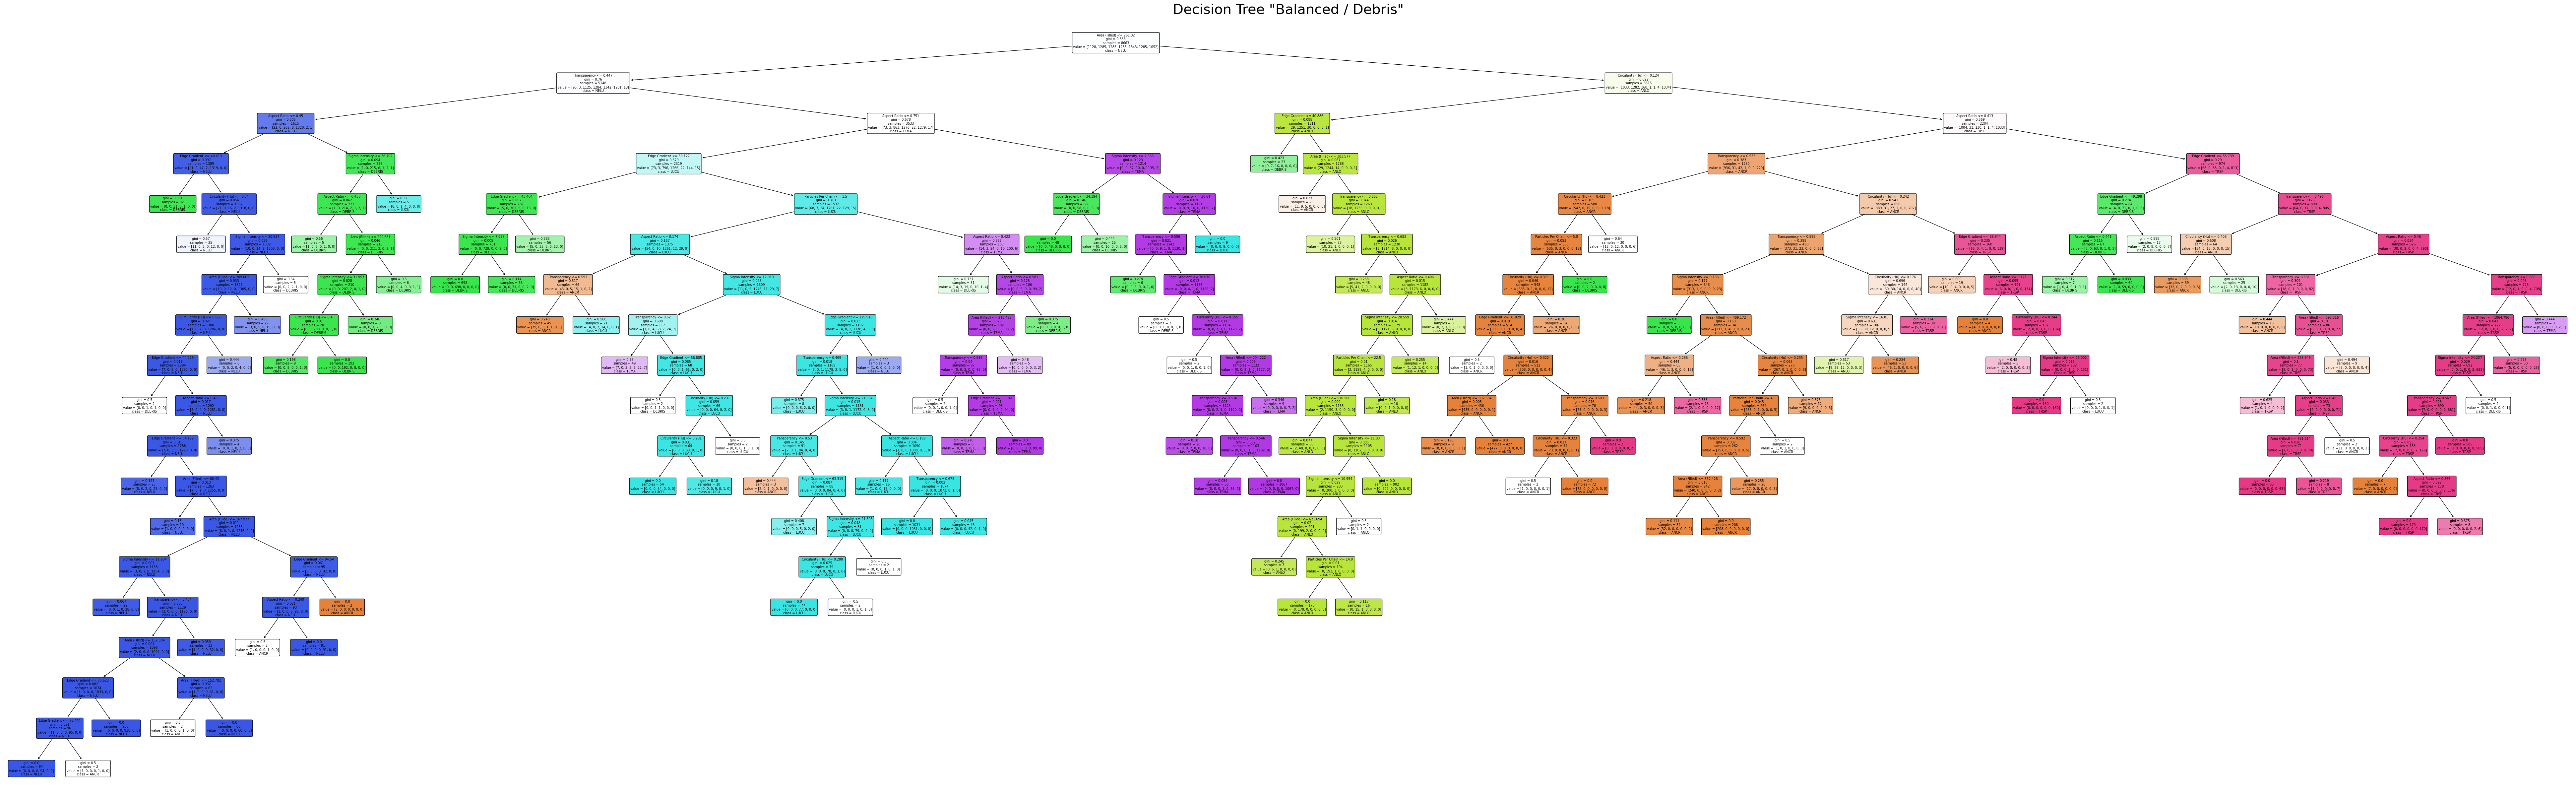

In [31]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(100,30))  # Set the figure size
plot_tree(best_tree, filled=True, feature_names=X_train.columns, class_names=class_names, rounded = True, fontsize=7)
plt.title('Decision Tree "Balanced / Debris"', fontsize=30, pad=20)
plt.savefig('DecisionTree_balanced_DEBRIS.png',dpi=300)
plt.show()


#tree fit to training data

## Prediction on test set

In [32]:
# use model with test data
predictions = best_tree.predict(X_test)
print(metrics.classification_report(y_test, best_tree.predict(X_test)))

              precision    recall  f1-score   support

           0       0.35      0.87      0.50       484
           1       0.34      0.98      0.50       299
           2       1.00      0.93      0.97     37275
           3       0.80      0.98      0.88      1104
           4       0.55      0.97      0.70       575
           5       0.64      0.96      0.77       550
           6       0.71      0.92      0.80       451

    accuracy                           0.94     40738
   macro avg       0.63      0.94      0.73     40738
weighted avg       0.97      0.94      0.95     40738



In [33]:
predictions_decoded = label_encoder.inverse_transform(predictions)
predictions_decoded

array(['DEBRIS', 'LUCU', 'DEBRIS', ..., 'DEBRIS', 'DEBRIS', 'DEBRIS'],
      dtype=object)

In [34]:
unique_values, counts = np.unique(predictions_decoded, return_counts=True)
for value, count in zip(unique_values, counts):
    print(f"{value}: {count}")

ANCR: 1198
ANLO: 860
DEBRIS: 34899
LUCU: 1354
NELU: 1013
TEMA: 824
TRSP: 590


In [35]:
from sklearn.metrics import classification_report

# test difference between untuned and tuned tree for test data
print('Classification report for the original tree:')
print()
print(metrics.classification_report(y_test, tree.predict(X_test_orig)))
print('Classification report for the tuned tree:')
print()
print(metrics.classification_report(y_test, best_tree.predict(X_test)))

with open('classification_report_balanced_DEBRIS.txt', 'w') as file:
    file.write(metrics.classification_report(y_test, best_tree.predict(X_test)))

Classification report for the original tree:

              precision    recall  f1-score   support

           0       0.31      0.90      0.46       484
           1       0.48      0.93      0.63       299
           2       1.00      0.93      0.96     37275
           3       0.80      0.98      0.88      1104
           4       0.57      0.97      0.72       575
           5       0.56      0.97      0.71       550
           6       0.50      0.96      0.65       451

    accuracy                           0.93     40738
   macro avg       0.60      0.95      0.72     40738
weighted avg       0.96      0.93      0.94     40738

Classification report for the tuned tree:

              precision    recall  f1-score   support

           0       0.35      0.87      0.50       484
           1       0.34      0.98      0.50       299
           2       1.00      0.93      0.97     37275
           3       0.80      0.98      0.88      1104
           4       0.55      0.97      0.70

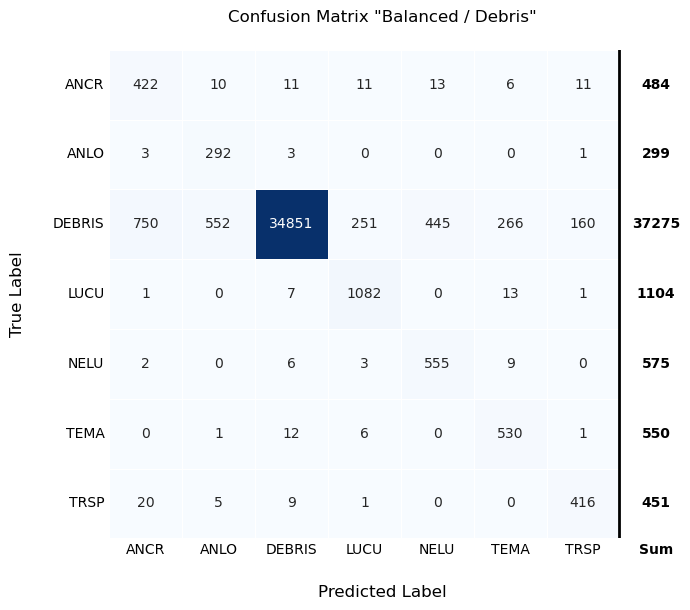

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# Assuming predictions and y_test are already defined
# predictions = ...
# y_test = ...
# class_names = ...

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Compute sums of true labels
row_sums = conf_matrix.sum(axis=1)

# Convert class_names to list and add 'Sum'
class_names = class_names.tolist() if isinstance(class_names, np.ndarray) else class_names
class_names_with_sum = class_names + ['Sum']

# Create the heatmap for the main confusion matrix (excluding the sum column)
fig, ax = plt.subplots(figsize=(7, 6.2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"fontsize": 10}, ax=ax, linewidths=.5)

# Adding aesthetics
plt.title('Confusion Matrix "Balanced / Debris"', fontsize=12, pad=20)
plt.xlabel('Predicted Label', labelpad=20, fontsize=12)
plt.ylabel('True Label', labelpad=20, fontsize=12)

# Tick labels can be the class names if you have them
plt.xticks(ticks=np.arange(len(class_names_with_sum)) + 0.5, labels=class_names_with_sum, fontsize=10, rotation=0)
plt.yticks(ticks=np.arange(len(class_names)) + 0.5, labels=class_names, rotation=0, fontsize=10)

# Overlay the sum column with centered text
for i, sum_value in enumerate(row_sums):
    ax.text(len(class_names) + 0.5, i + 0.5, sum_value, ha='center', va='center', fontsize=10, weight='bold', color='black')

# Add a vertical black line to separate the sums column
plt.axvline(x=len(class_names), color='black', linewidth=2)

# Bold the 'Sum' label on the x-axis
for tick in ax.get_xticklabels():
    if tick.get_text() == 'Sum':
        tick.set_weight('bold')

# Set other plot parameters
ax.tick_params(axis='y', which='both', length=0)  # Hide the tick marks
ax.tick_params(axis='x', which='both', length=0)
plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Show the plot
plt.savefig('confusion_matrix_balanced_DEBRIS.png', dpi=300, bbox_inches='tight')
plt.show()

In [37]:
from matplotlib import font_manager

# Check if Century Schoolbook is available
available_fonts = [f.name for f in font_manager.fontManager.ttflist]
'Century Schoolbook' in available_fonts  # Returns True if installed

True

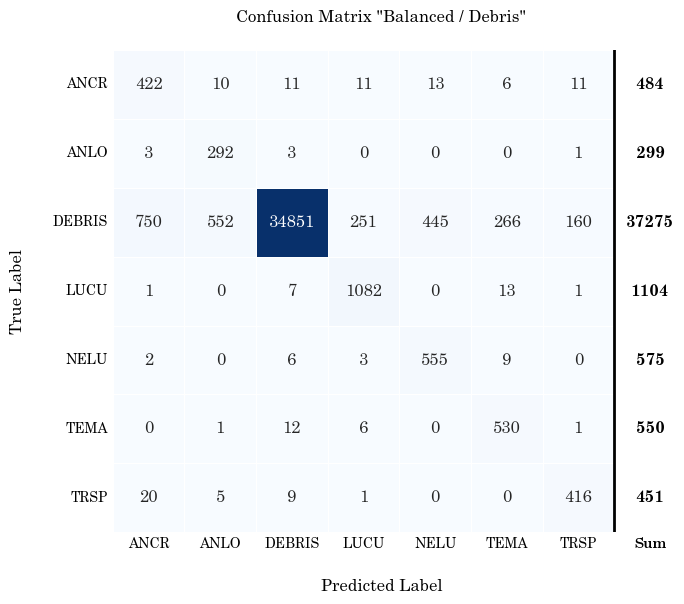

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
from matplotlib import font_manager

# Example font, make sure it's installed on your system
custom_font = "Century Schoolbook"

# Set font globally
plt.rcParams.update({
    'font.family': custom_font,
    'font.size': 12,        # Global font size
    'axes.labelsize': 12,    # Label font size
    'xtick.labelsize': 10,   # X tick label font size
    'ytick.labelsize': 10,   # Y tick label font size
    'axes.titlesize': 12     # Title font size
})

# Assuming predictions and y_test are already defined
# predictions = ...
# y_test = ...
# class_names = ...

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Compute sums of true labels
row_sums = conf_matrix.sum(axis=1)

# Convert class_names to list and add 'Sum'
class_names = class_names.tolist() if isinstance(class_names, np.ndarray) else class_names
class_names_with_sum = class_names + ['Sum']

# Create the heatmap for the main confusion matrix (excluding the sum column)
fig, ax = plt.subplots(figsize=(7, 6.2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"fontsize": 12, "fontfamily": custom_font}, ax=ax, linewidths=.5)

# Adding aesthetics
plt.title('Confusion Matrix "Balanced / Debris"', fontsize=12, pad=20, fontfamily=custom_font)
plt.xlabel('Predicted Label', labelpad=20, fontsize=12, fontfamily=custom_font)
plt.ylabel('True Label', labelpad=20, fontsize=12, fontfamily=custom_font)

# Tick labels can be the class names if you have them
plt.xticks(ticks=np.arange(len(class_names_with_sum)) + 0.5, labels=class_names_with_sum, fontsize=10, fontfamily=custom_font, rotation=0)
plt.yticks(ticks=np.arange(len(class_names)) + 0.5, labels=class_names, rotation=0, fontsize=10, fontfamily=custom_font)

# Overlay the sum column with centered text
for i, sum_value in enumerate(row_sums):
    ax.text(len(class_names) + 0.5, i + 0.5, sum_value, ha='center', va='center', fontsize=12, fontfamily=custom_font, weight='bold', color='black')

# Add a vertical black line to separate the sums column
plt.axvline(x=len(class_names), color='black', linewidth=2)

# Bold the 'Sum' label on the x-axis
for tick in ax.get_xticklabels():
    if tick.get_text() == 'Sum':
        tick.set_weight('bold')

# Set other plot parameters
ax.tick_params(axis='y', which='both', length=0)  # Hide the tick marks
ax.tick_params(axis='x', which='both', length=0)
plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Show the plot
plt.savefig('confusion_matrix_balanced_DEBRIS.png', dpi=300, bbox_inches='tight')
plt.show()

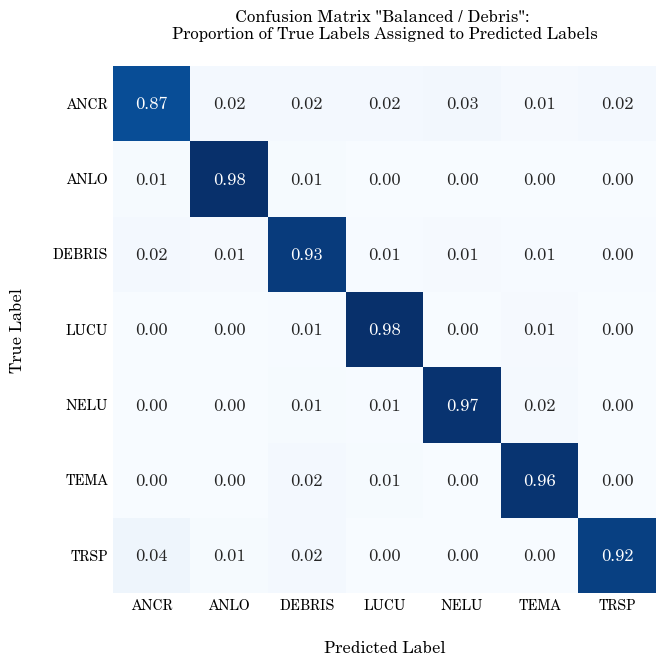

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Normalize the confusion matrix to display percentages
conf_matrix_percent = conf_matrix.astype(float) / conf_matrix.sum(axis=1)[:, np.newaxis]  # * 100

# Set the context for the plot
sns.set_context('talk')

# Create the heatmap for the confusion matrix
fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(conf_matrix_percent, annot=True, fmt='.2f', cmap='Blues', cbar=False,
            annot_kws={"fontsize": 12, "fontfamily": custom_font}, ax=ax)

# Adding aesthetics
plt.title('Confusion Matrix "Balanced / Debris": \n'
          'Proportion of True Labels Assigned to Predicted Labels', fontsize=12, pad=20, fontfamily=custom_font)
plt.xlabel('Predicted Label', labelpad=20, fontsize=12, fontfamily=custom_font)
plt.ylabel('True Label', labelpad=20, fontsize=12, fontfamily=custom_font)

# Tick labels can be the class names if you have them
plt.xticks(ticks=np.arange(len(class_names)) + 0.5, labels=class_names, fontsize=10, fontfamily=custom_font)
plt.yticks(ticks=np.arange(len(class_names)) + 0.5, labels=class_names, rotation=0, fontsize=10, fontfamily=custom_font)

# Set other plot parameters
ax.tick_params(axis='y', which='both', length=0)  # Hide the tick marks
ax.tick_params(axis='x', which='both', length=0)
plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Show the plot
plt.savefig('confusion_matrix_proportions_balanced_DEBRIS.png', dpi=300, bbox_inches='tight')
plt.show()


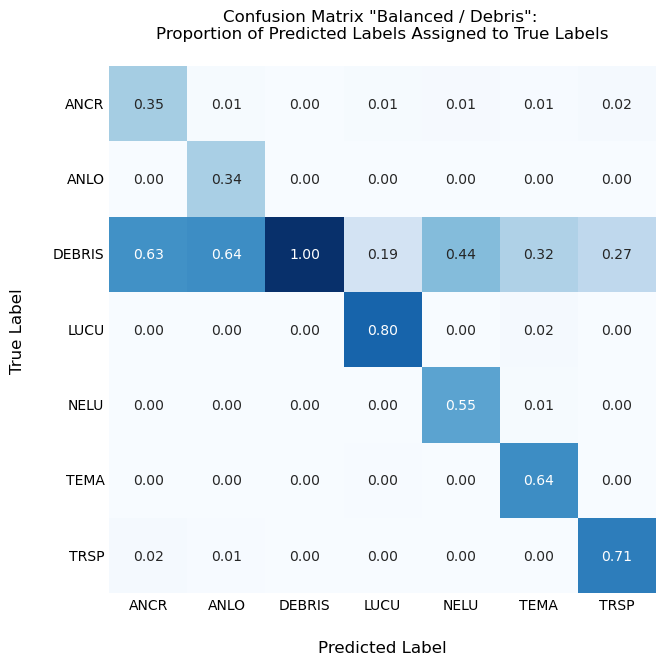

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Normalize the confusion matrix by column
conf_matrix_column_norm = conf_matrix.astype(float) / conf_matrix.sum(axis=0)

# Set the context for the plot
sns.set_context('talk')

# Create the heatmap for the column-normalized confusion matrix
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(conf_matrix_column_norm, annot=True, fmt='.2f', cmap='Blues', cbar=False, annot_kws={"fontsize": 10}, ax=ax)

# Adding aesthetics
plt.title('Confusion Matrix "Balanced / Debris": \n'
    'Proportion of Predicted Labels Assigned to True Labels', fontsize=12, pad=20)
plt.xlabel('Predicted Label', labelpad=20, fontsize=12)
plt.ylabel('True Label', labelpad=20, fontsize=12)

# Tick labels can be the class names if you have them
plt.xticks(ticks=np.arange(len(class_names)) + 0.5, labels=class_names, fontsize=10)
plt.yticks(ticks=np.arange(len(class_names)) + 0.5, labels=class_names, rotation=0, fontsize=10)

# Set other plot parameters
ax.tick_params(axis='y', which='both', length=0)  # Hide the tick marks
ax.tick_params(axis='x', which='both', length=0)
plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Show the plot
plt.savefig('confusion_matrix_column_normalized_balanced_DEBRIS.png', dpi=300, bbox_inches='tight')
plt.show()


In [326]:
predictions_decoded = label_encoder.inverse_transform(predictions)

# Create a new DataFrame to store X_test along with the predictions
data_results = data_all_reset.loc[X_test.index].copy()  # Copy X_test to avoid modifying the original DataFrame

data_results = data_results.rename(columns={'Class': 'True Label'})
data_results = data_results[['path','Particle ID','True Label']]
  # Extract the matched rows from the original DataFrame

# Add predictions and true labels to data_results using .loc
data_results.loc[:, 'Predictions'] = predictions_decoded
#data_results.loc[:, 'True Label'] = data_matched_X_test['Class']

# Now, data_results contains X_test along with the predictions and true labels

In [327]:
pd.set_option('display.max_colwidth', None) 
data_results
data_results.to_csv('C:/Users/svenj/Documents/Uni/Bachelorarbeit/Codes/tree_balanced_DEBRIS_results.csv', index=False)

In [328]:
# Define the class labels
class_labels = ['DEBRIS', 'ANCR', 'TEMA', 'NELU', 'LUCU', 'TRSP']

# Create a dictionary to store the separate DataFrames
split_dfs = {}



In [329]:
import os
import shutil
import pandas as pd

# Load the CSV file
file_path = 'C:/Users/svenj/Documents/Uni/Bachelorarbeit/Codes/tree_balanced_DEBRIS_results.csv'
data_results = pd.read_csv(file_path)

# Define your base source folder where images are located
base_source_folder = 'C:/Users/svenj/Documents/Uni/Bachelorarbeit/Codes/Daten'

# Define your base destination folder where copied images will be stored
base_destination_folder = 'C:/Users/svenj/Documents/Uni/Bachelorarbeit/Codes/mismatched_balanced_DEBRIS'

# Ensure the base destination folder exists
if not os.path.exists(base_destination_folder):
    os.makedirs(base_destination_folder)

# Function to generate the new image path based on Particle ID
def generate_image_path(row):
    # Extract components from the original path
    path = row['path'].replace('\\', '/')  # Replace backslashes with forward slashes for consistency
    particle_id = row['Particle ID'] - 1  # Reduce the Particle ID by 1

    # Always use 'images' folder
    images_folder = 'images'
    
    # Split the path into folder and filename
    folder, filename = os.path.split(path)
    
    # Split the filename into name and extension
    name, ext = os.path.splitext(filename)
    
    # Construct the new filename with the Particle ID formatted to 5 digits and extension .png
    new_filename = f"{name}_{particle_id:05d}.png"
    
    # Construct the new full path by combining the folder and new filename
    new_path = os.path.join(folder, images_folder, new_filename)
    
    return new_path

# Function to copy the image to the destination folder
def copy_image(row, destination_folder):
    src_image_path = generate_image_path(row)
    
    # Check if the source image file exists
    if not os.path.isfile(src_image_path):
        print(f"File not found: {src_image_path}")
        return
    
    # Ensure the destination folder exists, create it if not
    true_label = row['True Label']
    pred_label = row['Predictions']
    
    # Skip if the true label and predicted label are the same
    if true_label == pred_label:
        return
    
    dest_folder_name = f"true_{true_label}_pred_{pred_label}"
    dest_folder = os.path.join(destination_folder, dest_folder_name)
    if not os.path.exists(dest_folder):
        os.makedirs(dest_folder)
    
    # Construct the destination image path
    dest_image_path = os.path.join(dest_folder, os.path.basename(src_image_path))
    
    # Copy the image file to the destination path
    shutil.copy2(src_image_path, dest_image_path)
    
# Iterate over each row in the DataFrame
missing_files = 0
for index, row in data_results.iterrows():
    # Generate the new image path
    new_image_path = generate_image_path(row)
    
    # Copy the image to the destination folder based on True Label and Predictions
    try:
        copy_image(row, base_destination_folder)
    except Exception as e:
        print(f"Error processing row {index}: {e}")
        missing_files += 1

print(f"Total missing files: {missing_files}")


Total missing files: 0
